#### Logistic Regression Survival Prediction

#### Project Summary
I trained a logistic regression model using age, class, sex, fare, and other passenger details to predict whether a person survived the Titanic disaster.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('datasets/cleaned_titanic.csv')

#### Data Cleaning

I cleaned the data by dropping the rows that has NaN values from the selected columns required for training and testing.

In [56]:
cleaned_df=df[['Pclass','Age','Sex','Embarked','Parch','Fare','SibSp','Survived']].dropna()
features=cleaned_df[['Pclass','Age','Sex','Embarked','Parch','Fare','SibSp']]
target=cleaned_df['Survived']

X=features
X.shape
y=target


### PreProcessing
### Encode Categorical Features

Sex and Embarked are non-numeric.
I used OneHotEncoder to convert them into binary indicator variables so the model can read them.

In [58]:
categorical = ["Sex", "Embarked"]
numeric = ["Pclass", "Age", "SibSp", "Parch", "Fare"]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical),
        ("num", "passthrough", numeric)
    ]
)


### Train Test Split
### Split the Dataset (80% Training, 20% Testing)

This keeps model evaluation fair and prevents overfitting.
The model learns on the training set and is evaluated on unseen data.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

X_train.shape, X_test.shape


((569, 7), (143, 7))

#### Fit the Logistic Regression Model

I created a pipeline that applies preprocessing first, then trains the model.
This keeps the entire workflow clean and repeatable.

In [60]:
from sklearn.pipeline import Pipeline

log_reg = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=500))
])

log_reg.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


#### Predictions

The model predicts survival (0 or 1) for the test dataset.

In [61]:
y_pred = log_reg.predict(X_test)
y_pred[:10]


array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1])

**What I Did**

- Encoded categorical features using OneHotEncoder.
- Split the dataset into training and testing sets.
- Trained a logistic regression model.
- Generated predictions for the unseen test data.

**What the Output Shows**
- The model returns 0s and 1s indicating predicted survival.These predictions will be evaluated in Accuracy and Confusion Matrix task using accuracy and a confusion matrix.

#### Insights

- The model is now trained but not yet evaluated.
- Tomorrow’s evaluation will show how well it performs and where it misclassifies passengers.

# Accuracy and Confusion Matrix - Evaluating Logistic Regression Model

### Summary:This Section evaluates the logistic regression model trained on the Titanic dataset.  
It measures model accuracy and visualizes prediction performance using a confusion matrix.  
The goal is to understand how well the classifier distinguishes between survivors and non-survivors.

**Goal:** To compute the model's accuracy score and generate a confusion matrix that shows true positives, false positives, true negatives, and false negatives.  
These evaluation tools help assess prediction quality and guide improvements in later steps.



In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Predictions from previous day
y_pred = log_reg.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

acc, cm


(0.7972027972027972,
 array([[73,  7],
        [22, 41]]))

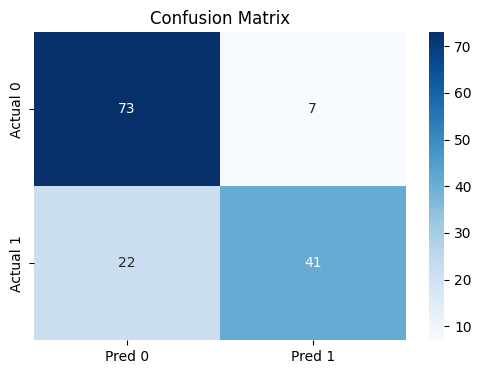

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.show()


|          | Predicted 0          | Predicted 1          |
| -------- | -------------------- | -------------------- |
| Actual 0 | True Negatives (TN)  | False Positives (FP) |
| Actual 1 | False Negatives (FN) | True Positives (TP)  |


### Model Evaluation: Accuracy and Confusion Matrix

### What I Did
- Loaded `accuracy_score` and `confusion_matrix` from scikit-learn.  
- Used `log_reg.predict(X_test)` to generate predictions from the model trained on Day 24.  
- Calculated accuracy as a simple performance metric.  
- Built a confusion matrix and visualized it using a Seaborn heatmap.

### What the Output Shows
- `acc` returns a numeric accuracy score (percentage of correct predictions).  
- `cm` returns a 2×2 matrix showing:
  - True Negatives (top-left)  
  - False Positives (top-right)  
  - False Negatives (bottom-left)  
  - True Positives (bottom-right)  
- The heatmap provides a clear visual breakdown of prediction outcomes.

### Insights
- Strong diagonal values indicate good prediction performance.  
- High off-diagonal values would show confusion between survival and non-survival.  
- This evaluation highlights whether further steps like feature tuning or class balancing are required.
